# Dataset Distributuion

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

DATAROOT = "/SSD2/bgkang/Chemomile/"
sys.path.append(DATAROOT)

# plt.rcParams['font.family'] = 'DejaVu Sans'
data = {}

COLORMAP = {
	"red"   : "#AF272F",
	"blue"  : "#00558C",
	"green" : "#719949",
	"yellow": "#D38235",
	"purple": "#642F6C",
	"orange": "#BE531C",
	"lightblue": "#61AFEF",
	"black" : "#000000",
	"white" : "#ECEFF4"
}

DATA = {
    "FP" : [],
    "AIT" : [],
    "HCOM" : [],
    "FLVL" : [],
    "FLVU" : [],
}

In [6]:
import torch
import numpy as np
from src.data import Dataset

for key in DATA.keys():
    dataset = Dataset(target = key, root = DATAROOT)
    DATA[key] = torch.cat([data.y for data in dataset.total_loader]).detach().numpy()
    DATA[key] = DATA[key] * dataset.std + dataset.mean

	DataDump found for 'FP'. Loading dumped data.
Training : 768 | Validation : 96 | Test : 96
Total : 960
	DataDump found for 'AIT'. Loading dumped data.
Training : 454 | Validation : 57 | Test : 57
Total : 568
	DataDump found for 'HCOM'. Loading dumped data.
Training : 727 | Validation : 91 | Test : 91
Total : 909
	DataDump found for 'FLVL'. Loading dumped data.
Training : 375 | Validation : 47 | Test : 47
Total : 469
	DataDump found for 'FLVU'. Loading dumped data.
Training : 319 | Validation : 40 | Test : 40
Total : 399


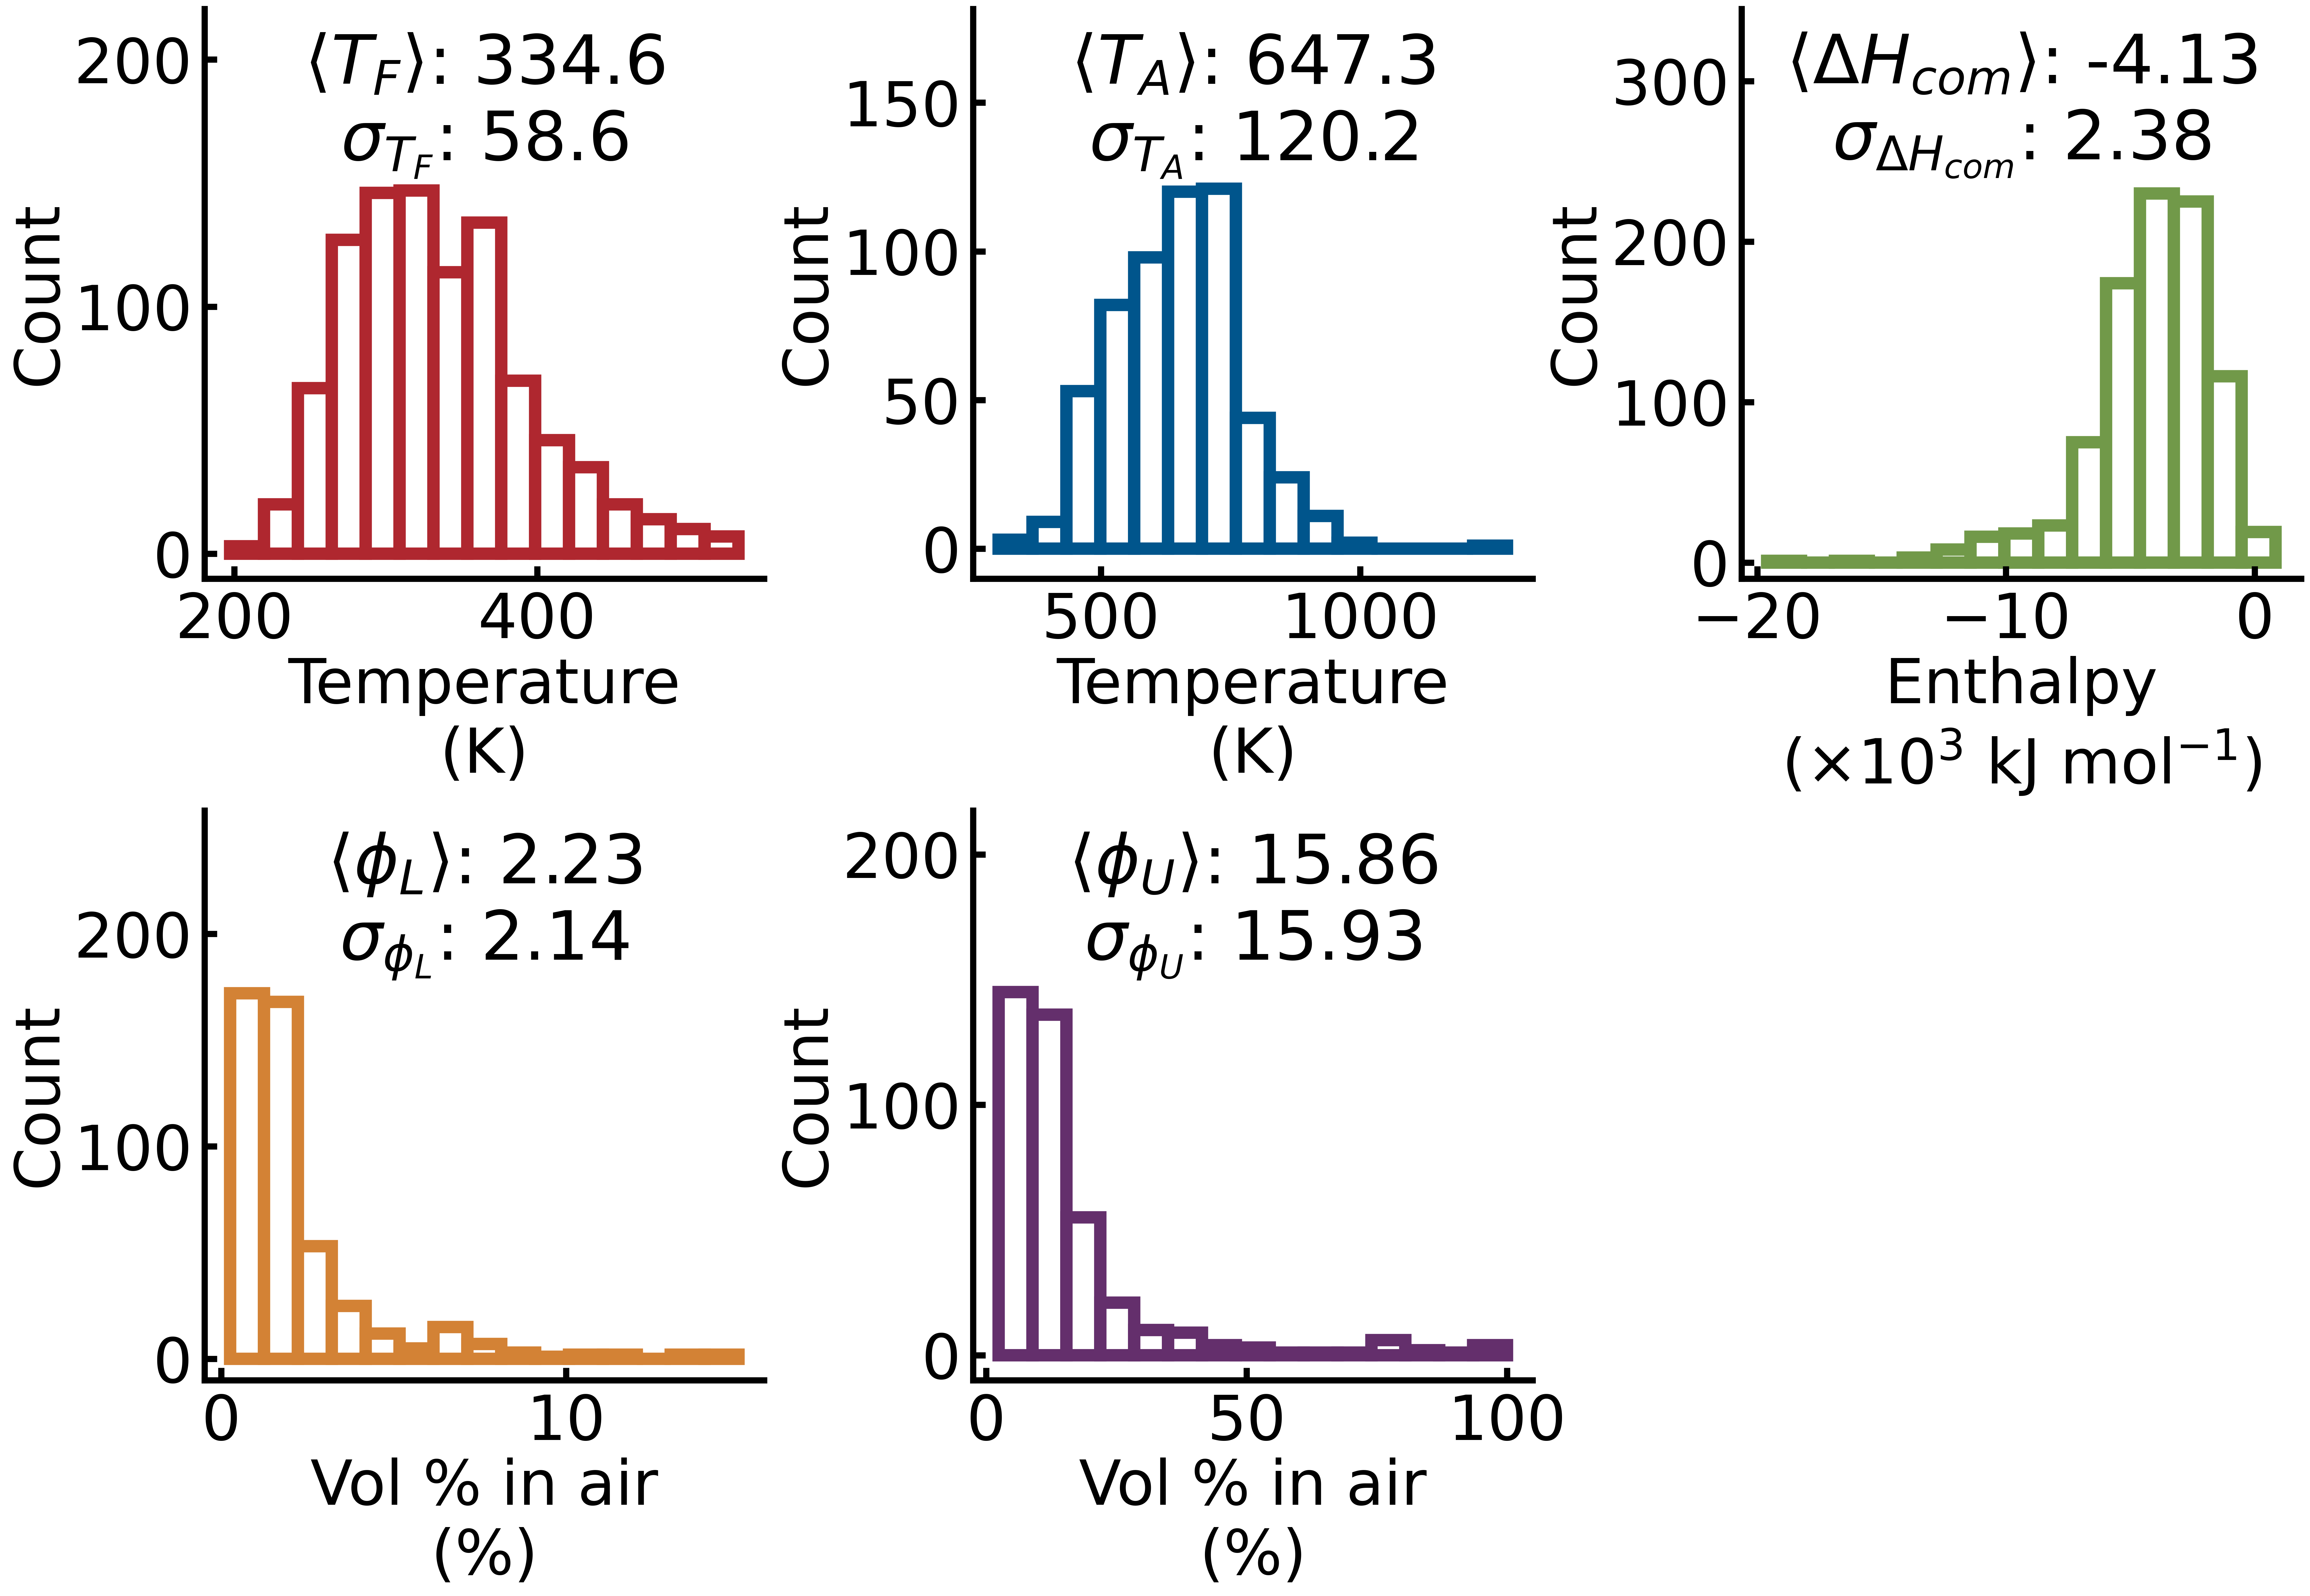

In [15]:
fig, ax = plt.subplots(2, 3, figsize = (26, 18), dpi = 300)

FONTSIZE = 55
LABELSIZE = 50
ANNOTBACKGROUND = "#FFFFFF99"
AXESWIDTH = 5

ax[0][0].set_ylabel('Count', fontsize = LABELSIZE)
ax[0][0].set_xlabel("Temperature\n(K)", fontsize = LABELSIZE)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['left'].set_linewidth(AXESWIDTH)
ax[0][0].spines['bottom'].set_linewidth(AXESWIDTH)
ax[0][0].tick_params(labelsize = LABELSIZE, direction = 'in', width = AXESWIDTH, pad = 10, length = 10)
ax[0][0].hist(DATA['FP'], bins = 15, color = "#FFFFFF", edgecolor = COLORMAP['red'], linewidth = 10)
ax[0][0].annotate(r"""$\langle T_F \rangle$: %.01f
$\sigma_{T_F}$: %.1f""" % (DATA['FP'].mean(), DATA['FP'].std()),
                xy = (0.5, 0.70), ha = 'center', va = 'bottom', xycoords = 'axes fraction', fontsize = FONTSIZE)
ax[0][0].set_ylim(-10, np.histogram(DATA['FP'], bins = 15)[0].max() * 1.5)

ax[0][1].set_ylabel('Count', fontsize = LABELSIZE)
ax[0][1].set_xlabel("Temperature\n(K)", fontsize = LABELSIZE)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_linewidth(AXESWIDTH)
ax[0][1].spines['bottom'].set_linewidth(AXESWIDTH)
ax[0][1].tick_params(labelsize = LABELSIZE, direction = 'in', width = AXESWIDTH, pad = 10, length = 10)
ax[0][1].hist(DATA['AIT'], bins = 15, color = "#FFFFFF", edgecolor = COLORMAP['blue'], linewidth = 10)
ax[0][1].annotate(r"""$\langle T_A \rangle$: %.01f
$\sigma_{T_A}$: %.1f""" % (DATA['AIT'].mean(), DATA['AIT'].std()),
                xy = (0.5, 0.70), ha = 'center', va = 'bottom', xycoords = 'axes fraction', fontsize = FONTSIZE)
ax[0][1].set_ylim(-10, np.histogram(DATA['AIT'], bins = 15)[0].max() * 1.5)

ax[0][2].set_ylabel('Count', fontsize = LABELSIZE)
ax[0][2].set_xlabel(r"""Enthalpy
($\times 10^{3}$ kJ mol$^{-1}$)""", fontsize = LABELSIZE)
ax[0][2].spines['top'].set_visible(False)
ax[0][2].spines['right'].set_visible(False)
ax[0][2].spines['left'].set_linewidth(AXESWIDTH)
ax[0][2].spines['bottom'].set_linewidth(AXESWIDTH)
ax[0][2].tick_params(labelsize = LABELSIZE, direction = 'in', width = AXESWIDTH, pad = 10, length = 10)
ax[0][2].hist(DATA['HCOM'], bins = 15, color = "#FFFFFF", edgecolor = COLORMAP['green'], linewidth = 10)
ax[0][2].annotate(r"""$\langle \Delta H_{com} \rangle$: %.02f
$\sigma_{\Delta H_{com}}$: %.02f""" % (DATA['HCOM'].mean(), DATA['HCOM'].std()),
                xy = (0.5, 0.70), ha = 'center', va = 'bottom', xycoords = 'axes fraction', fontsize = FONTSIZE)
ax[0][2].set_ylim(-10, np.histogram(DATA['HCOM'], bins = 15)[0].max() * 1.5)

ax[1][0].set_ylabel('Count', fontsize = LABELSIZE)
ax[1][0].set_xlabel("Vol % in air\n(%)", fontsize = LABELSIZE)
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['left'].set_linewidth(AXESWIDTH)
ax[1][0].spines['bottom'].set_linewidth(AXESWIDTH)
ax[1][0].tick_params(labelsize = LABELSIZE, direction = 'in', width = AXESWIDTH, pad = 10, length = 10)
ax[1][0].hist(DATA['FLVL'], bins = 15, color = "#FFFFFF", edgecolor = COLORMAP['yellow'], linewidth = 10)
ax[1][0].annotate(r"""$\langle \phi_{L} \rangle$: %.02f
$\sigma_{\phi_{L}}$: %.02f""" % (DATA['FLVL'].mean(), DATA['FLVL'].std()),
                xy = (0.5, 0.70), ha = 'center', va = 'bottom', xycoords = 'axes fraction', fontsize = FONTSIZE)
ax[1][0].set_ylim(-10, np.histogram(DATA['FLVL'], bins = 15)[0].max() * 1.5)

ax[1][1].set_ylabel('Count', fontsize = LABELSIZE)
ax[1][1].set_xlabel("Vol % in air\n(%)", fontsize = LABELSIZE)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_linewidth(AXESWIDTH)
ax[1][1].spines['bottom'].set_linewidth(AXESWIDTH)
ax[1][1].tick_params(labelsize = LABELSIZE, direction = 'in', width = AXESWIDTH, pad = 10, length = 10)
ax[1][1].hist(DATA['FLVU'], bins = 15, color = "#FFFFFF", edgecolor = COLORMAP['purple'], linewidth = 10)
ax[1][1].annotate(r"""$\langle \phi_{U} \rangle$: %.02f
$\sigma_{\phi_{U}}$: %.02f""" % (DATA['FLVU'].mean(), DATA['FLVU'].std()),
                xy = (0.5, 0.70), ha = 'center', va = 'bottom', xycoords = 'axes fraction', fontsize = FONTSIZE)
ax[1][1].set_ylim(-10, np.histogram(DATA['FLVU'], bins = 15)[0].max() * 1.5)

ax[1][2].set_visible(False)

plt.tight_layout()
plt.savefig('Chemomile_Data.png', dpi = 300)
plt.show()